In [133]:
import numpy as np
from pandas.io.parsers import read_csv

valores=read_csv("data3.csv",header=None).to_numpy()

In [134]:
valores_ent = valores[0:70, :] #un 70% para entrenamiento y un 30% para test
valores_test = valores[70:100, :]
X = valores_ent[:, 0:2] #[fila[0:2] for fila in valores]
Y = valores_ent[:,2]

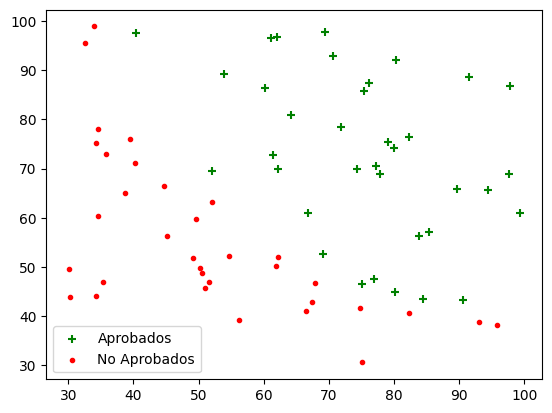

In [135]:
import matplotlib.pyplot as plt

pos = np.where(Y == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "Aprobados")

neg = np.where(Y == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "No Aprobados")

plt.legend()
plt.show()


In [136]:
def func_sigmoide(w,b,x):
    z = np.dot(x,w)+b
    return 1/(1+np.exp(-z))

In [137]:
def func_coste(y_hat, Y):
    Y_resd=Y-y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)

def funcion_grad(X, Y, w, b):
    return np.dot(func_sigmoide(w, b, X) - Y,X), np.sum(func_sigmoide(w, b, X) - Y)

def actualizar_valores(w, b, X, y, y_hat, alpha):
    db = (np.sum(y_hat-y)*2)/len(y)
    dw = np.dot((y_hat-y),X)*2/len(y)
    b1 = b - alpha * db
    w1 = w - alpha * dw
    return w1, b1

def descenso_gradiente(alpha, X, Y, iter):
    w = np.array([0.0,0.0])
    b = 0.0
    for i in range(iter):
        y_hat = func_sigmoide(w,b,X)
        b0 = b
        w0 = w
        w, b = actualizar_valores(w0, b0, X, Y, y_hat, alpha)
    return w, b

w, b = descenso_gradiente(0.01, X, Y, 2000) 
w,b
    

(array([-0.09791596, -0.49544685]), -3.1481588337447994)

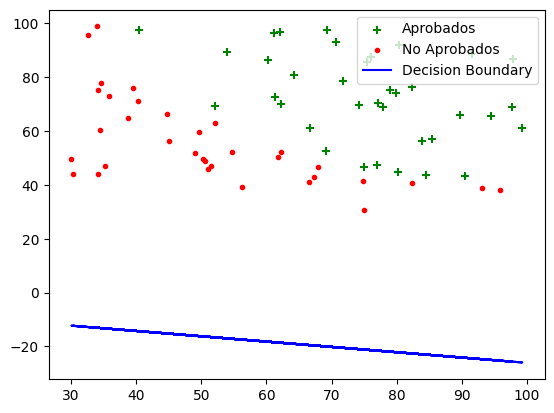

In [138]:
pos = np.where(Y == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "Aprobados")

neg = np.where(Y == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "No Aprobados")

def decision_boundary(X, w, b):
    return (-w[0]*X-b)/w[1]

#b = -100
#w = np.array([0.82,0.78]) creo que tiene que dar algo asi
X1 = X[:,0]
plt.plot(X1, decision_boundary(X1, w, b), c='b', label = "Decision Boundary")

plt.legend()
plt.show()

In [140]:
def accuracy(X, Y, w, b):
    y_hat = func_sigmoide(w,b,X)
    y_hat = np.where(y_hat < 0.5, 0, 1)
    return np.sum(y_hat == Y)/len(Y)

X_test = valores_test[:, 0:2]
Y_test = valores_test[:,2]
accuracy(X_test, Y_test, w, b)

0.2